In [2]:
%matplotlib inline

import math
import numpy as np
import numpy.linalg as la
from importlib import reload
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import \
    beta, norm, gamma, kstest, alpha, \
    t, recipinvgauss, ncf, ksone, johnsonsu, \
    maxwell, weibull_min, weibull_max
import pandas as pd
a4_dims = (11.7, 1*8.27)

In [5]:
import src.analysis.tms_entropy as tms
reload(tms)

<module 'src.analysis.tms_entropy' from '/home/garro/Projects/masterarbeit/src/analysis/tms_entropy.py'>

In [6]:
import src.analysis.state_entropy as state_h
reload(state_h)

<module 'src.analysis.state_entropy' from '/home/garro/Projects/masterarbeit/src/analysis/state_entropy.py'>

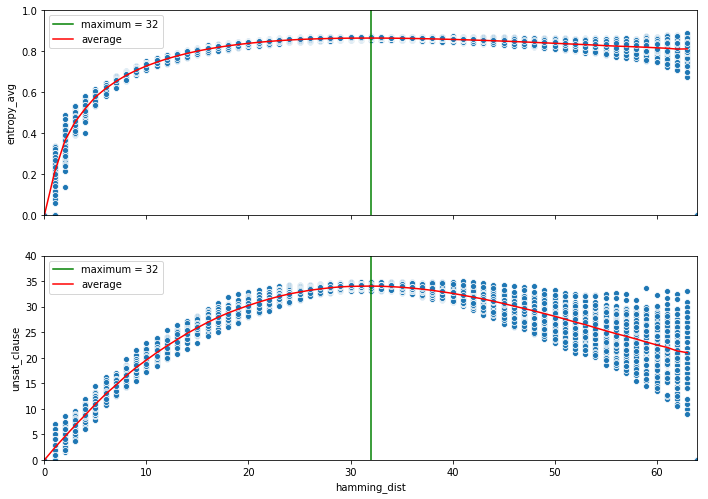

In [70]:
df1 = state_h.get_unsat_clause_avg_to_hamming_dist('probsat_test.db')
df12 = state_h.get_unsat_clause_to_hamming_dist('probsat_test.db')
df2 = state_h.get_state_entropy_avg_to_hamming_dist('probsat_test.db')
df22 = state_h.get_state_entropy_to_hamming_dist('probsat_test.db')
fig, (ax_h, ax_c) = plt.subplots(2, 1, figsize=a4_dims, sharex=True)
ax_h.set_ylim([0,1])
ax_c.set_ylim([0,40])
ax_h.set_xlim([0,64])

_, max_idx_1 = df1.idxmax()
ax_c.axvline(x=max_idx_1, label=f'maximum = {max_idx_1}', color='g')

_, max_idx_2 = df2.idxmax()
ax_h.axvline(x=max_idx_2, label=f'maximum = {max_idx_2}', color='g')

sns.lineplot(x='hamming_dist', y='unsat_clause_avg', data=df1, ax=ax_c, color='r', label='average')
sns.scatterplot(x='hamming_dist',y='unsat_clause', data=df12, ax=ax_c)
sns.lineplot(x='hamming_dist', y='entropy_avg', data=df2, ax=ax_h, color='r', label='average')
sns.scatterplot(x='hamming_dist',y='entropy_avg', data=df22, ax=ax_h)

/usr/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


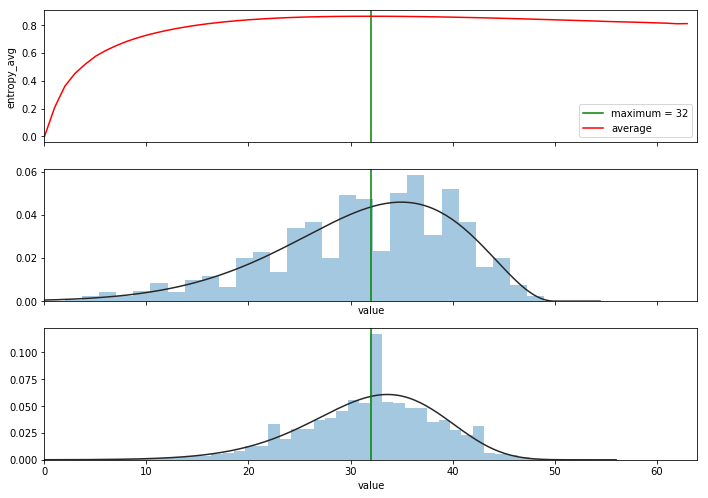

In [13]:
import src.analysis.dynamic_entropy as path_h
reload(path_h)

field='mutual_information'

df0 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'minimum_at')
df1 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'maximum_at')
df2 = state_h.get_state_entropy_avg_to_hamming_dist('probsat_test.db')
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=a4_dims, sharex=True)
sns.distplot(df0['value'], ax=ax1, fit=beta, kde=False)
sns.distplot(df1['value'], ax=ax2, fit=beta, kde=False)
ax0.set_xlim([0,64])

_, max_idx_2 = df2.idxmax()
ax0.axvline(x=max_idx_2, label=f'maximum = {max_idx_2}', color='g')
ax1.axvline(x=max_idx_2, label=f'maximum = {max_idx_2}', color='g')
ax2.axvline(x=max_idx_2, label=f'maximum = {max_idx_2}', color='g')

sns.lineplot(x='hamming_dist', y='entropy_avg', data=df2, ax=ax0, color='r', label='average')

/usr/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


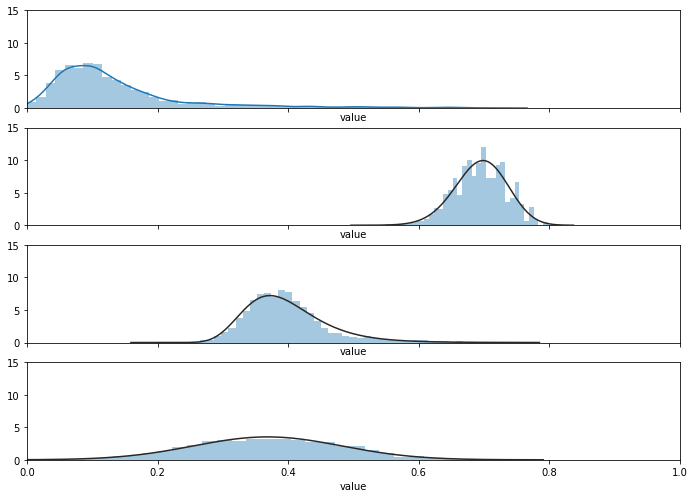

In [14]:
reload(path_h)

field='mutual_information'

df0 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'minimum')
df1 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'maximum')
df2 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'average')
df3 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'latest')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=a4_dims, sharex=True)
ax0.set_xlim([0,1])
ax0.set_ylim([0,15])
ax1.set_ylim([0,15])
ax2.set_ylim([0,15])
ax3.set_ylim([0,15])

sns.distplot(df0['value'], ax=ax0, kde=True, hist=True)
sns.distplot(df1['value'], ax=ax1, fit=beta, kde=False, hist=True)
sns.distplot(df2['value'], ax=ax2, fit=alpha, kde=False, hist=True)
sns.distplot(df3['value'], ax=ax3, fit=norm, kde=False, hist=True)

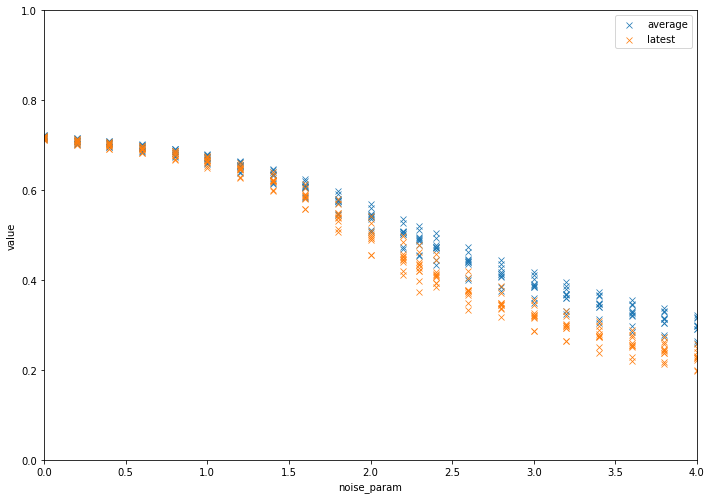

In [77]:
reload(path_h)
entropy='mutual_information'
dfs = []
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_xlim([0,4])
ax.set_ylim([0,1])
for value in ['average', 'latest']:
    df = path_h.noise_param_to_path_entropy(
        '/media/sf_VBoxshare/MasterarbeitDaten',
        'probsat',
        f'{entropy}',
        f'{value}'
    )
    
    sns.scatterplot(
        x='noise_param', y='value',
        data=df, estimator=np.mean,
        marker='x', label=f'{value}', ax=ax, 
    )

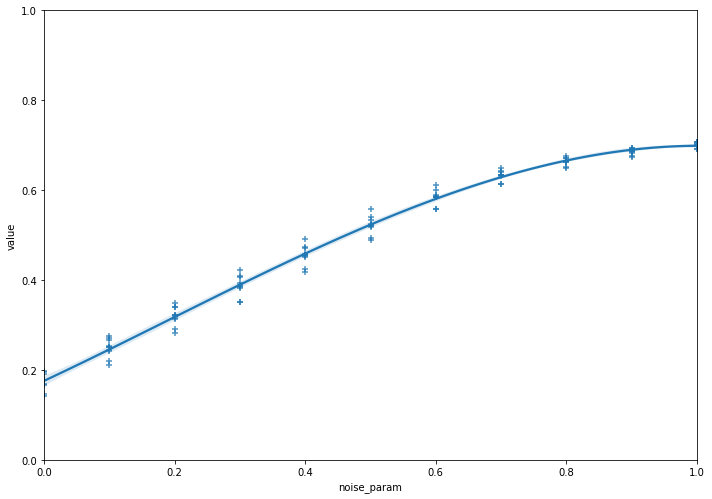

In [49]:
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
sns.regplot(x='noise_param', y='value', data=df, order=4, marker='+')